In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [ ]:
#Load training and testing dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train /255
x_test = x_test /255



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# network Architecture using keras
model =keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model using Sgd
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history =model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9532 - loss: 0.1633 - val_accuracy: 0.9553 - val_loss: 0.1572
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9570 - loss: 0.1553 - val_accuracy: 0.9580 - val_loss: 0.1491
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9593 - loss: 0.1455 - val_accuracy: 0.9579 - val_loss: 0.1449
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9607 - loss: 0.1410 - val_accuracy: 0.9603 - val_loss: 0.1397
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9638 - loss: 0.1307 - val_accuracy: 0.9616 - val_loss: 0.1329
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9642 - loss: 0.1300 - val_accuracy: 0.9631 - val_loss: 0.1276
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9664 - loss: 0.1233 - val_accuracy: 0.9638 - val_loss: 0.1274
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9679 - loss: 0.1158 - 

In [ ]:
# Evaluate network
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9622 - loss: 0.1355
Loss=0.115
Accuracy=0.967


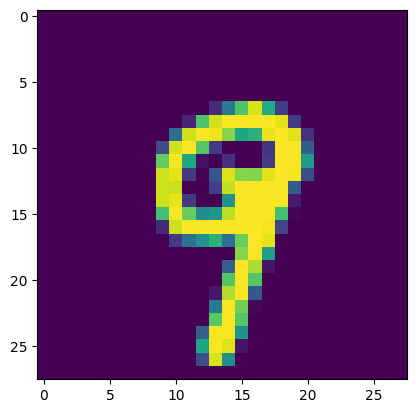

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


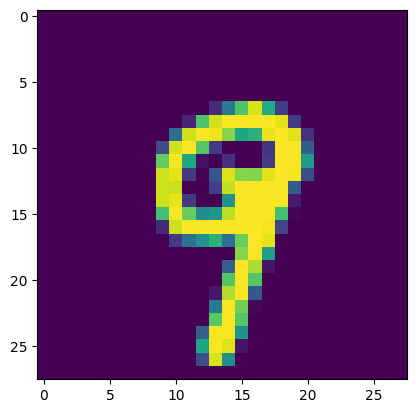

prdicted value: [6.1440949e-07 1.3347675e-07 2.9193174e-07 4.1700076e-04 3.7090053e-04
 1.7873729e-06 1.6332862e-08 5.2480184e-04 5.1532093e-05 9.9863285e-01]


In [ ]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()
print('prdicted value:' ,predicted_value[n])

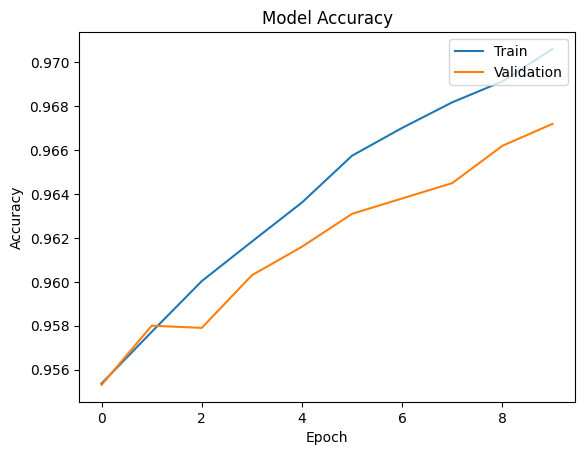

In [ ]:
# plot training loss and accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


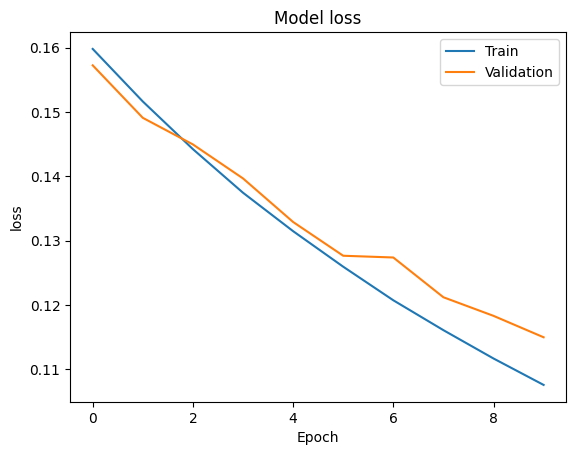

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()